In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "C:\\Users\\30448\\Documents\\Kaggle\\SFsalaries"
df = pd.read_csv( path + "\\input\\salaries.csv")
print "Dataset has %d rows and %d columns" % (df.shape[0] , df.shape[1] ) 

Dataset has 148654 rows and 13 columns
   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

  BasePay OvertimePay OtherPay Benefits   TotalPay  TotalPayBenefits  Year  \
0  167411           0   400184      NaN  567595.43         567595.43  2011   
1  155966      245132   137811      NaN  538909.28         538909.28  2011   
2  212739      106088  16452.6      NaN  335279.91         335279.91  2011   
3   77916     56120.7   198307      NaN  332343.61         332343.61  2011   
4  134402        9737   182235      NaN  326373.19         326373.19  2011   

   Notes         Agency Status  
0 

In [31]:
df["EmployeeName"] = df["EmployeeName"].apply(lambda x:x.lower())
df["JobTitle"] = df["JobTitle"].apply(lambda x:x.lower())
df["namelength"] = df["EmployeeName"].apply(lambda x:len(x.split()))
df["compoundName"] = df["EmployeeName"].apply(lambda x: 1 if "-" in x else 0 )

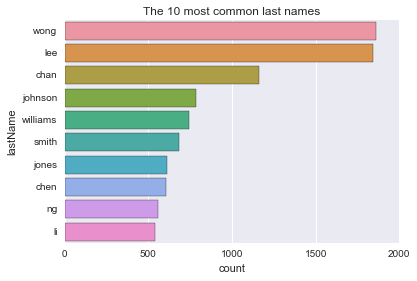

In [32]:
#last name analysis
def lastName(x):
    sp = x.split()
    if sp[-1].lower() == "jr":
        return sp[-2]
    else:
        return sp[-1]  

df["lastName"] = df["EmployeeName"].apply(lastName)
sns.countplot(y = "lastName" , data = df , order=df["lastName"].value_counts()[:10].index)
sns.plt.title("The 10 most common last names")

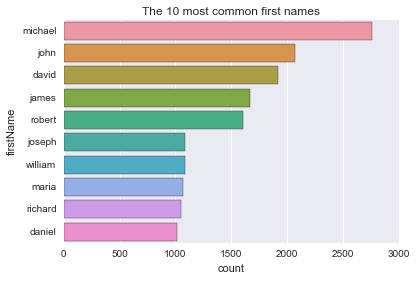

In [33]:
#first name
df["firstName"] = df["EmployeeName"].apply(lambda x:x.split()[0])
sns.countplot(y = "firstName" , data = df , order=df["firstName"].value_counts()[:10].index)
sns.plt.title("The 10 most common first names")

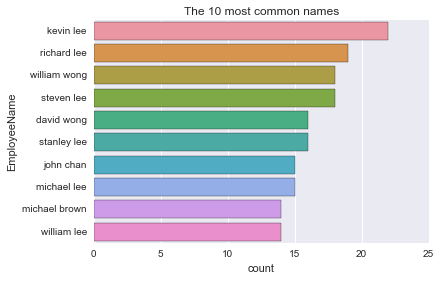

In [34]:
sns.countplot(y = "EmployeeName" , data = df , order=df["EmployeeName"].value_counts()[:10].index)
sns.plt.title("The 10 most common names")

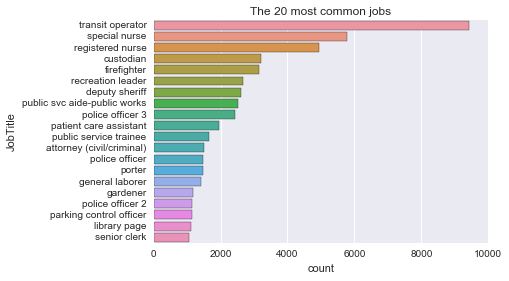

In [37]:
# job titles
sns.countplot(y = "JobTitle" , data = df , order=df["JobTitle"].value_counts()[:20].index)
sns.plt.title("The 20 most common jobs")

In [38]:
most_freq_jobs = df["JobTitle"].value_counts()[:10].index
top_names = []
for job in most_freq_jobs:
    #print job  , list(  df.loc[df["JobTitle"] == job]["firstName"].value_counts()[:3].index  )
    top_names.append(list(  df.loc[df["JobTitle"] == job]["firstName"].value_counts()[:3].index  ))   

print ( pd.DataFrame(top_names , index = most_freq_jobs)  )

                                    0        1            2
transit operator              michael     john        james
special nurse                   maria     mary     jennifer
registered nurse                maria     mary     jennifer
custodian                          li    maria         luis
firefighter                   michael     john        david
recreation leader             michael   robert  christopher
deputy sheriff                michael   robert        david
public svc aide-public works   robert  michael        james
police officer 3              michael   robert         john
patient care assistant          maria     mark         mary


In [39]:
#pre-processing the salaries: replacing NaN and strings by median
salary_types = ["BasePay" , "OvertimePay" , "OtherPay" ,"Benefits" , "TotalPay" ]
colors = ['b', 'r' , 'g' ,'k' , 'y' ]
for i,salary in enumerate(salary_types):    
    df[salary] = df[salary].fillna("Not Provided") 
    median = np.median([int(x) for x in df[salary] if not (type(x) == str)])    
    df[salary] = df[salary].apply(lambda x: median if (type(x) == str) else int(x))    
    #ax = sns.kdeplot(df[salary] , color = colors[i] )
    #ax.set_xlim(-100000,100000)       

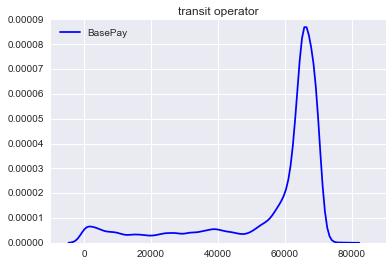

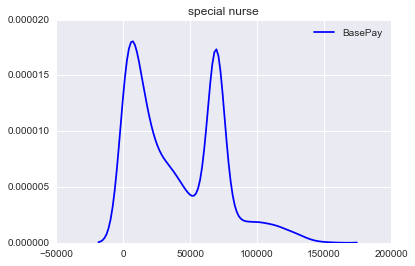

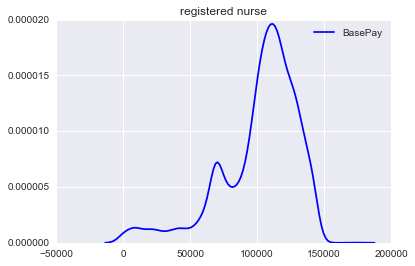

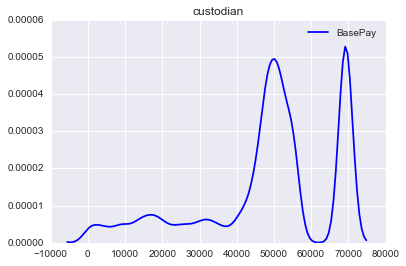

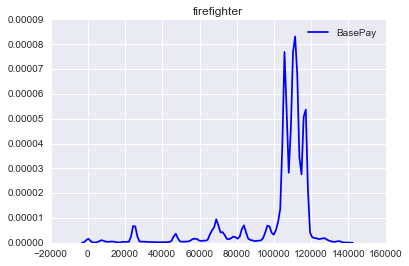

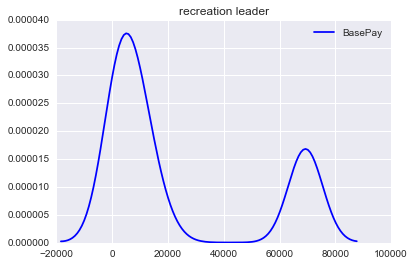

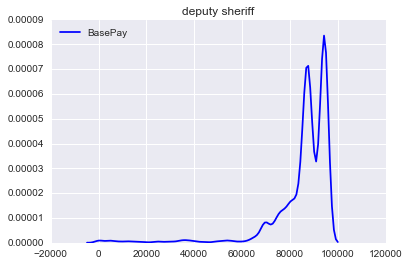

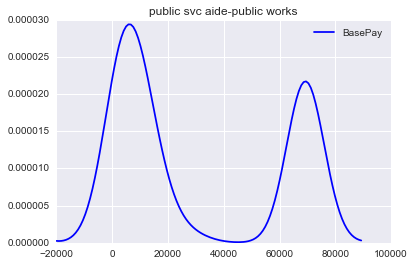

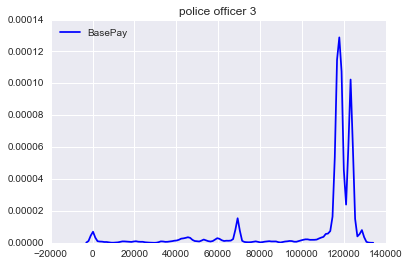

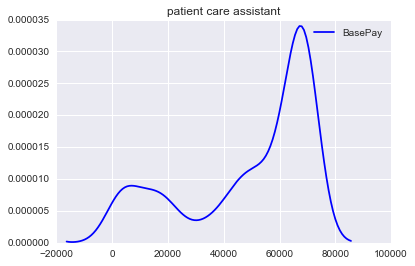

In [40]:
#salary distribution by jobs (take only the most freq jobs)
most_freq_jobs = df["JobTitle"].value_counts()[:10].index
for job in most_freq_jobs:    
    job_salary  = df.loc[df["JobTitle"] == job]["BasePay"]
    #overtime = df.loc[df["JobTitle"] == job]["OvertimePay"]
    plt.figure()
    ax = plt.axes()
    sns.kdeplot(job_salary , color = 'b' , ax = ax )
    #sns.kdeplot(overtime , color = 'r' , ax = ax )    
    ax.set_title(job)

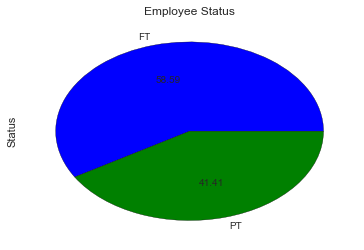

In [42]:
# Are people mostly Full Time or Part Time Employee?
df["Status"].value_counts().plot(kind = "pie" , title = "Employee Status" , autopct='%.2f')